In [1]:
import numpy as np
import pandas as pd


####2023, BsC holders earn 10 more on average
# data = {
#     'ID': [1, 2, 3, 4, 5,6,7,8,9,10],
#     'A': [1, 0, 0, 1,1,0,0,1,1,1],
#     'B': [0,1,1,0,1,1,1,0,0,0],
#     'T': [1,1,1,0,0,1,1,0,0,1],
#     'O': [100, 80, 20, 100, 90,10,50,80,10,100]
# }

# df = pd.DataFrame(data)
# df.head()




# #2024 BsC holders earn -16.6 less on average
data = {
    'ID': [1, 2, 3, 4, 5,6,7,8,9,10],
    'A': [1, 0, 0, 1,1,0,0,1,1,1],
    'B': [0,1,1,0,1,1,1,0,0,0],
    'T': [1,1,1,0,0,1,1,0,0,1],
    'O': [10, 80, 20, 100, 90,10,50,80,100,100]
}
# # # data = {
# # #     'ID': [1, 2, 3, 4, 5,6],
# # #     'Country': ['US', 'US', 'India', 'India', 'China','India'],
# # #     'Gender': ['Male', 'Non-binary', 'Male', 'Female', 'Male','Female'],
# # #     'Age': ['20-30 years old', '20-30 years old', '20-30 years old', '20-30 years old', '20-30 years old', '20-30 years old'],
# # #     'Role': ['Data Scientist', 'QA developer', 'Data Scientist', 'QA developer', 'Back-end developer','QA developer'],
# # #     'Education': [0, 1, 1, 0, 0,0],
# # #     'Salary': [170, 80, 120, 30, 90,30]
# # # }




df = pd.DataFrame(data)
#tuple deletion
#df = df[df['ID'].isin([1,2,3,6]) ]
df.head(6)

,ID,A,B,T,O
0,1,1,0,1,10
1,2,0,1,1,80
2,3,0,1,1,20
3,4,1,0,0,100
4,5,1,1,0,90
5,6,0,1,1,10


In [2]:
from dowhy import CausalModel

def get_effect(df, treatment, outcome, graph):
    
    model = CausalModel(
        data=df,
        treatment=treatment,
        outcome=outcome,
        graph=graph,
    )
    identified_estimand = model.identify_effect(
        proceed_when_unidentifiable=True
    )
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression",
        confidence_intervals = True,
        test_significance=True,
    )

    print(estimate)

In [3]:
dag = "digraph {A -> T; A -> O; B -> T; B -> O; T -> O;}"
#original 10
#all -38.8

#no 9 -34
# df = df[df['ID'].isin([1,2,3,4,5,6,7,8,10]) ]
#no 1 6
# df = df[df['ID'].isin([2,3,4,5,6,7,8,9,10]) ]
#no 1,9 10
# df = df[df['ID'].isin([2,3,4,5,6,7,8,10]) ]

get_effect(df, 'T', 'O', dag)


# for i in range(1,11):
#     ids = [1,2,3,4,5,6,7,8,9,10]
#     ids.remove(i)
#     df_i = df[df['ID'].isin(ids) ]
#     print('#######################################################')
#     print(i)
#     get_effect(df_i, 'T', 'O', dag)

# import itertools
# items = [1,2,3,4,5,6]
# for pair in itertools.combinations(items, 2):
#     #print(pair)
#     ids = [1,2,3,4,5,6]
#     ids.remove(pair[0])
#     ids.remove(pair[1])
#     df_i = df[df['ID'].isin(ids) ]
#     print('#######################################################')
#     print(pair)
#     get_effect(df_i, 'Education', 'Salary', dag)


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d            
────(E[O|B,A])
d[T]          
Estimand assumption 1, Unconfoundedness: If U→{T} and U→O then P(O|T,B,A,U) = P(O|T,B,A)

## Realized estimand
b: O~T+B+A
Target units: ate

## Estimate
Mean value: -38.333333333333314
p-value: [0.27446598]
95.0% confidence interval: [[-116.33586719   39.66920052]]



C:\Users\brity\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


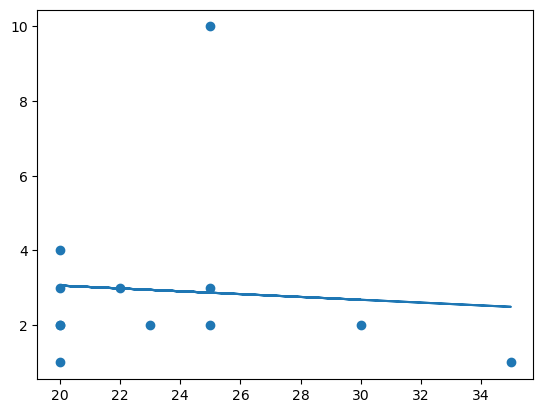

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([20,30,20,35,25,20,20,22,25,23,20,25])
y = np.array([1,2,3,1,3,2,2,3,2,2,4,10])

m,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,m*x+b)

In [17]:

from statsmodels.formula.api import ols
import statsmodels.api as sm

X = sm.add_constant(x)
model = sm.OLS(y,X).fit()

np.set_printoptions(suppress = True)

infl = model.get_influence()

cooks = infl.cooks_distance

cooks[0]
# summary_cooks = infl.summary_farme()
# summry_cooks

array([0.06466399, 0.01569619, 0.00005254, 0.6725801 , 0.00014777,
       0.01710076, 0.01710076, 0.00000273, 0.00654028, 0.007311  ,
       0.01351933, 0.44003778])